## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [8]:
len(df['CarName'].unique())

147

In [9]:
df['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [10]:
#df["CarName"]  = df['CarName'].str.split(" ").str[0]

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
len(df['CarName'].unique())

147

In [13]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [14]:
df['CarName'] = df['CarName'].str.split(" ").str[0]

In [15]:
df['CarName'].unique()
#len(df['CarName'].unique())

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
df['CarName'].replace('maxda','mazda',inplace=True)
df['CarName'].replace('Nissan','nissan',inplace=True)
df['CarName'].replace('porcshce','porsche',inplace=True)
df['CarName'].replace('toyouta','toyota',inplace=True)
df['CarName'].replace('vokswagen','volkswagen',inplace=True)
df['CarName'].replace('vw','volkswagen',inplace=True)

In [17]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [19]:
df = df.drop('car_ID',axis=1)

In [20]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [21]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [22]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [23]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [24]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [25]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [26]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [27]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [28]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

## Visualization:-




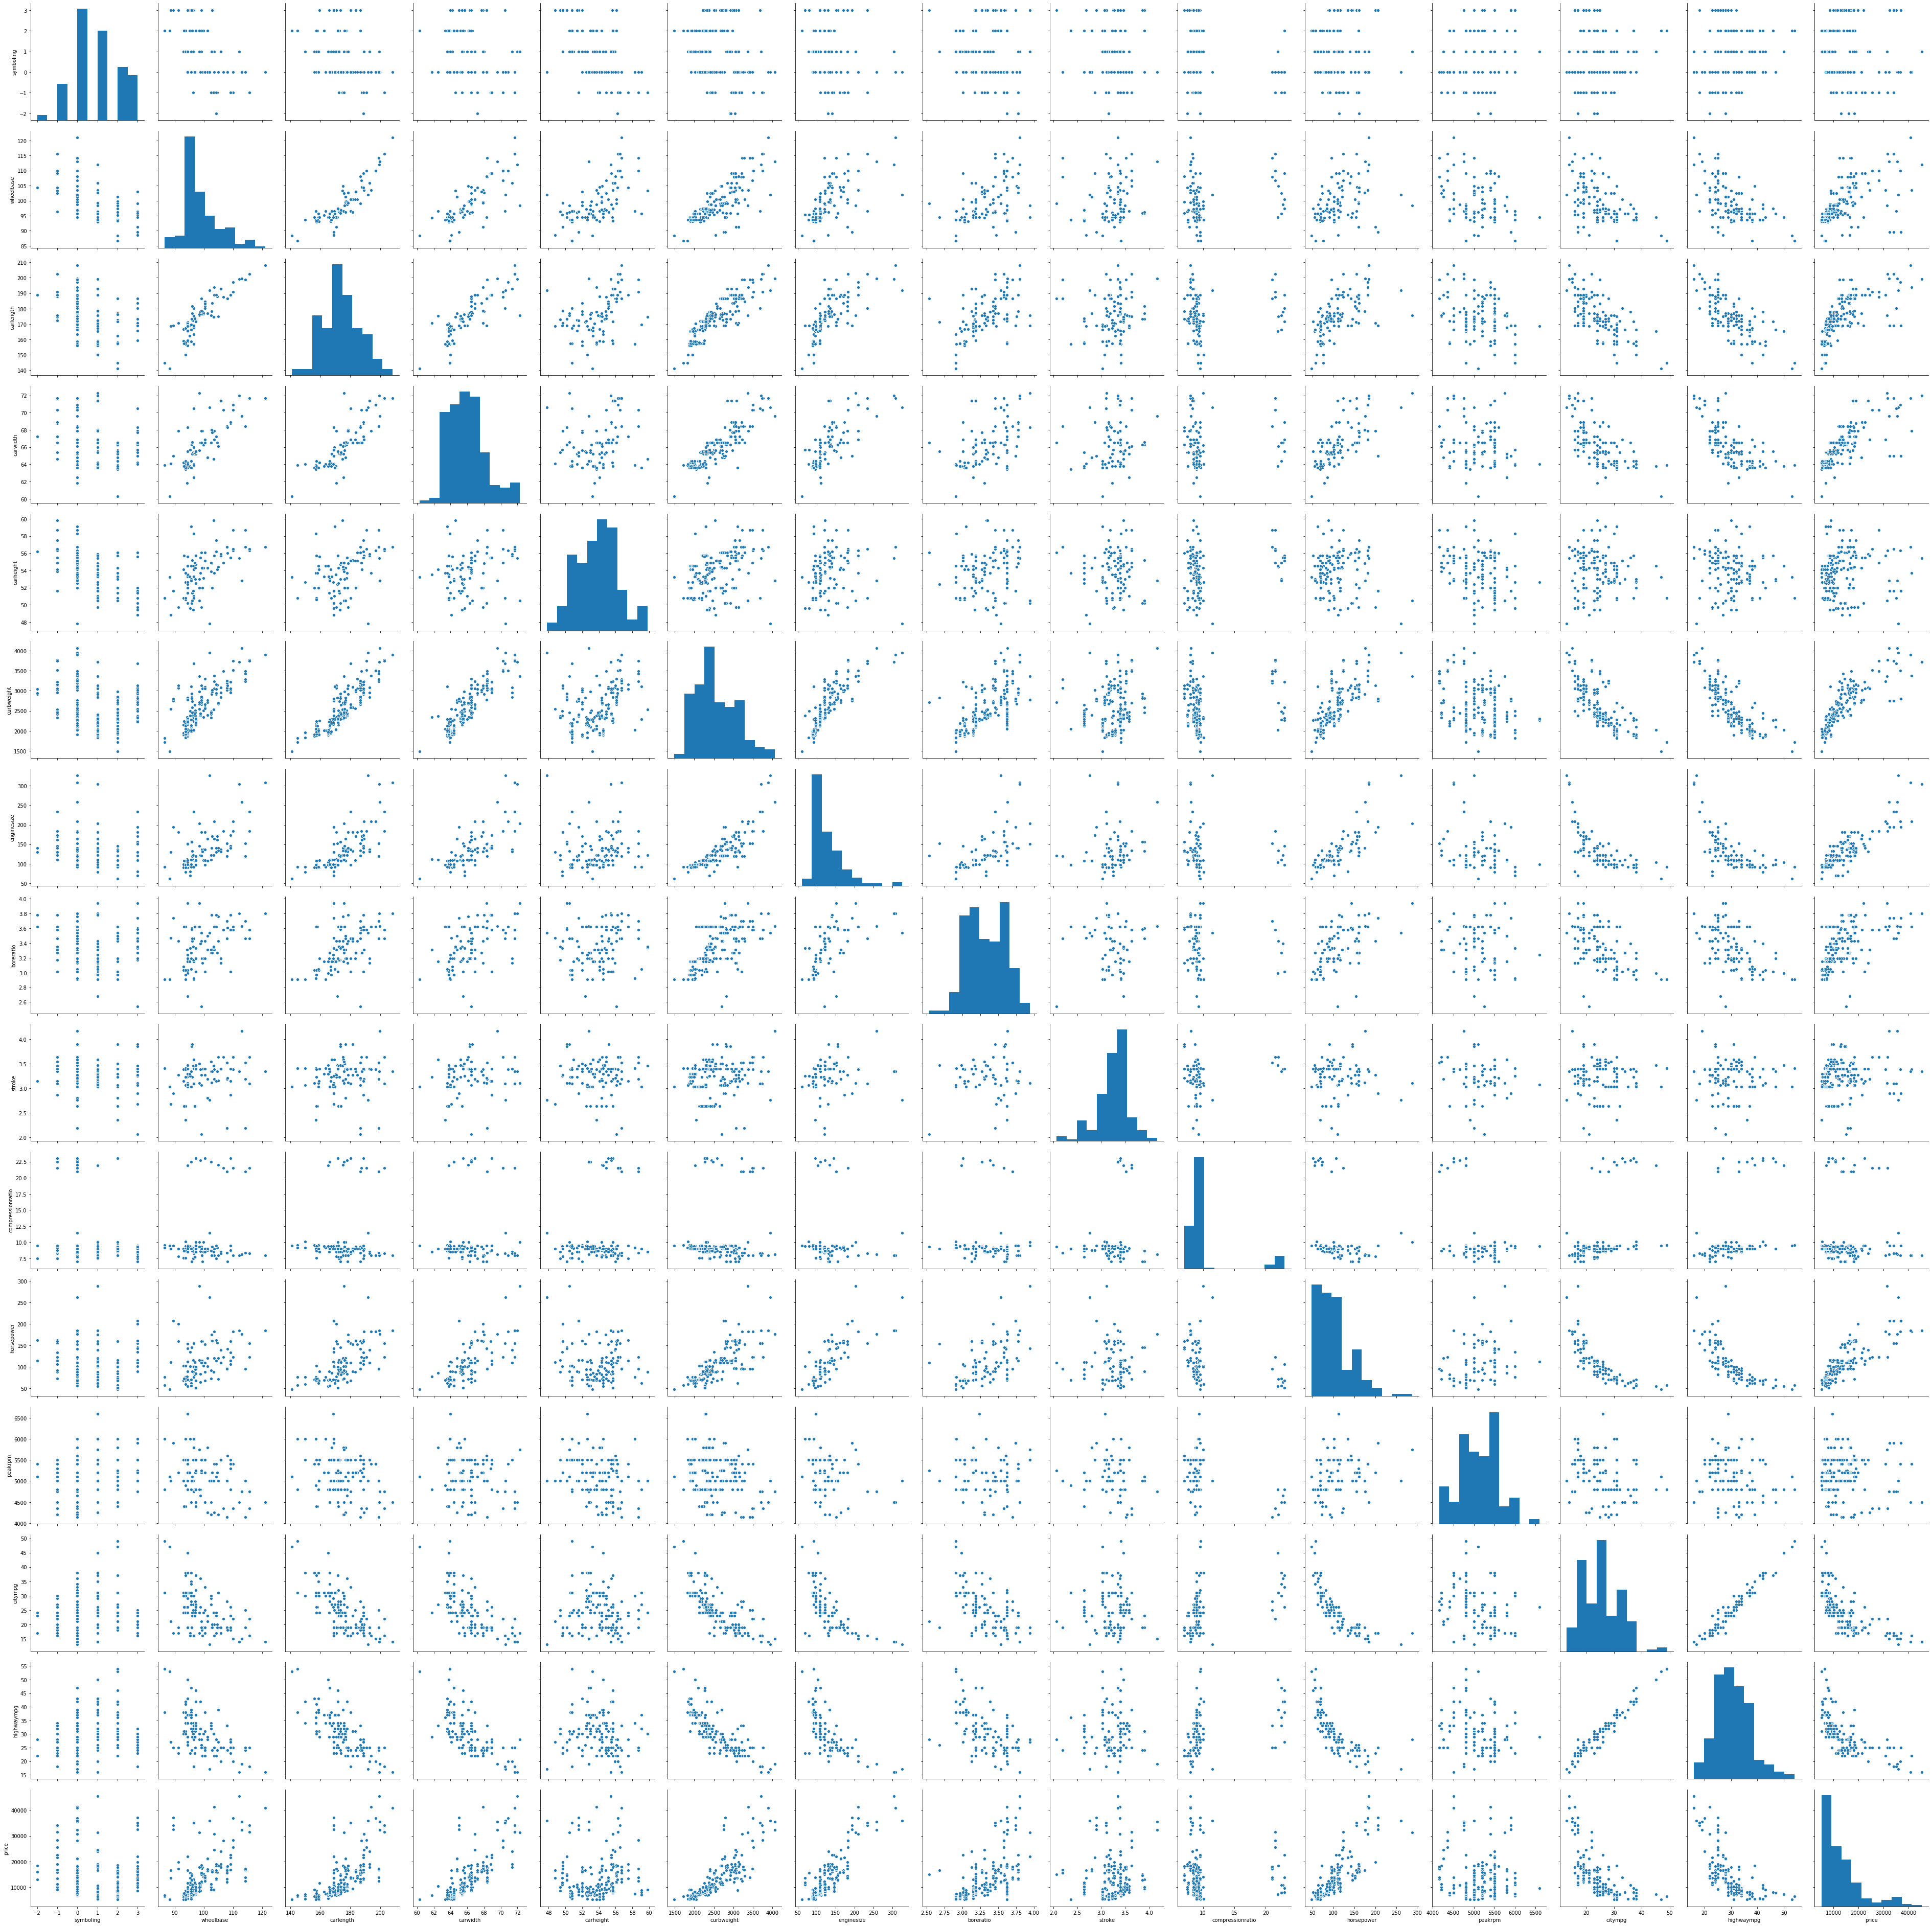

In [29]:
#visualizing the numeric features
sns.pairplot(df,height = 3.5)

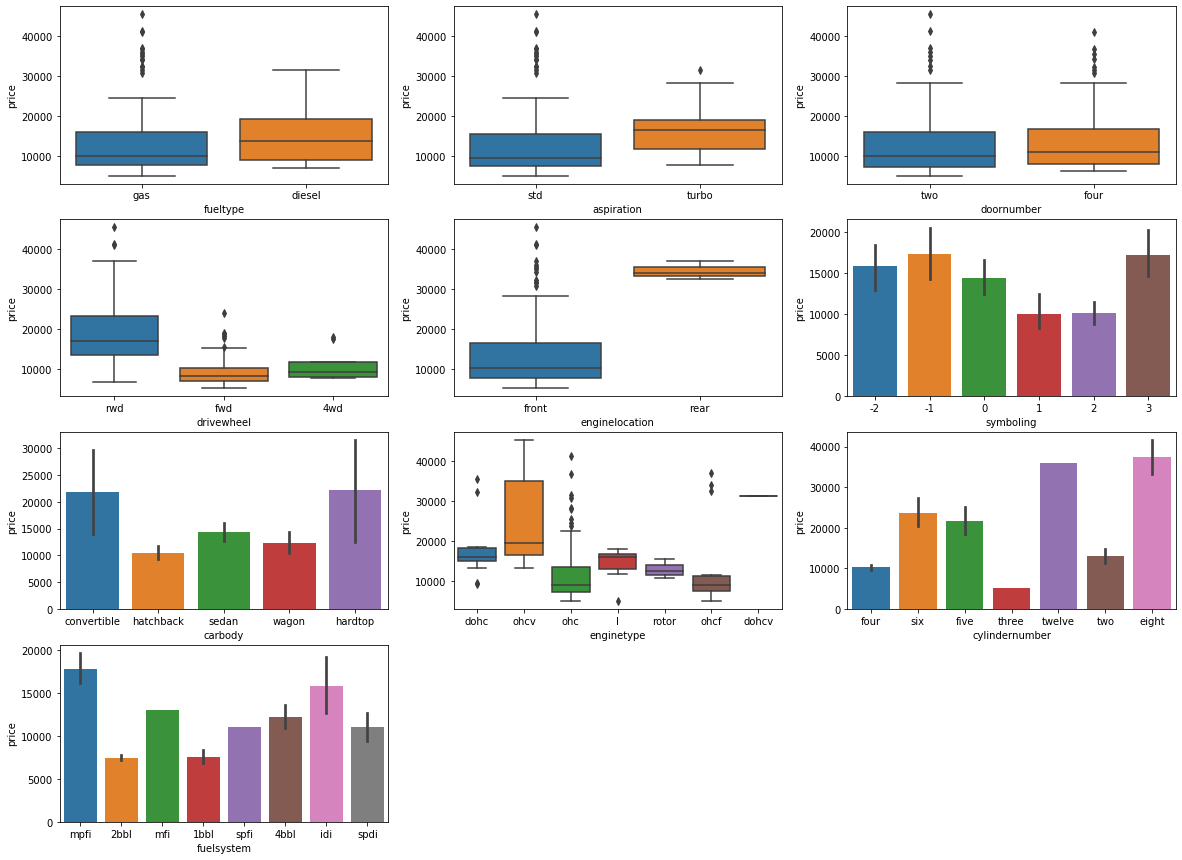

In [30]:
#visualizing the categorical features
plt.figure(figsize = (20,15))


plt.subplot(4,3,1)
sns.boxplot(x='fueltype',y='price',data=df)

plt.subplot(4,3,2)
sns.boxplot(x='aspiration',y='price',data=df)

plt.subplot(4,3,3)
sns.boxplot(x='doornumber',y='price',data=df)

plt.subplot(4,3,4)
sns.boxplot(x='drivewheel',y='price',data=df)

plt.subplot(4,3,5)
sns.boxplot(x='enginelocation',y='price',data=df)

plt.subplot(4,3,6)
sns.barplot(x='symboling',y='price',data=df)

plt.subplot(4,3,7)
sns.barplot(x='carbody',y='price',data=df)

plt.subplot(4,3,8)
sns.boxplot(x='enginetype',y='price',data=df)

plt.subplot(4,3,9)
sns.barplot(x='cylindernumber',y='price',data=df)

plt.subplot(4,3,10)
sns.barplot(x='fuelsystem',y='price',data=df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

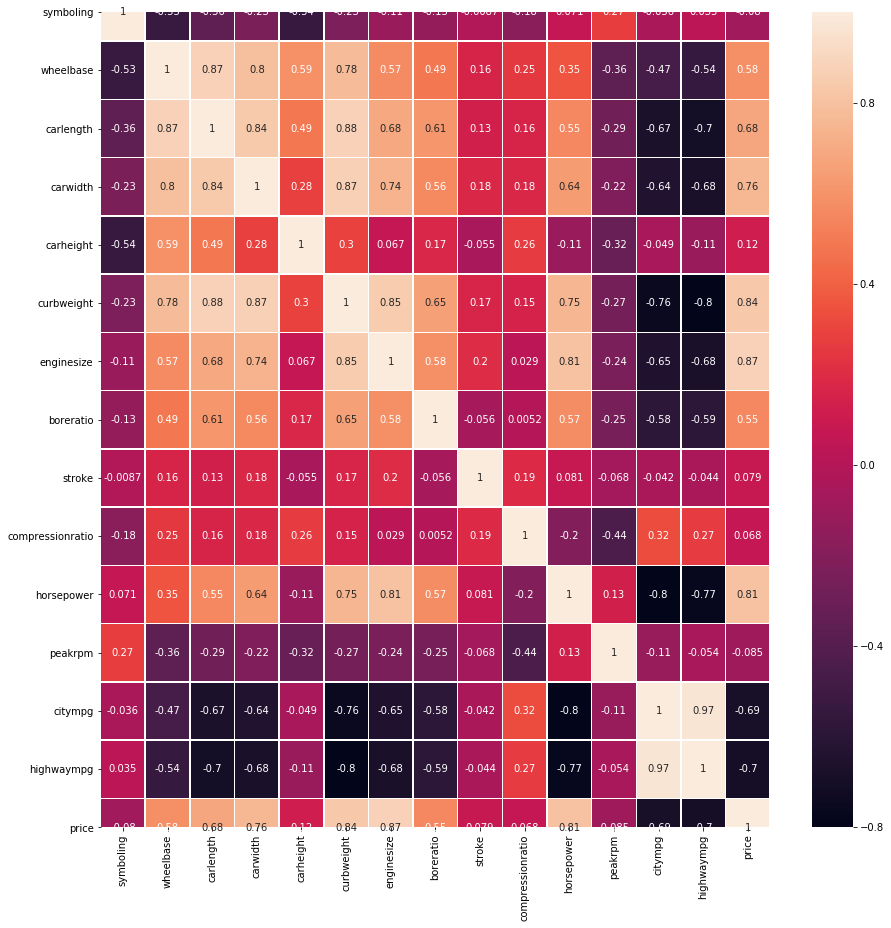

In [32]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

In [33]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


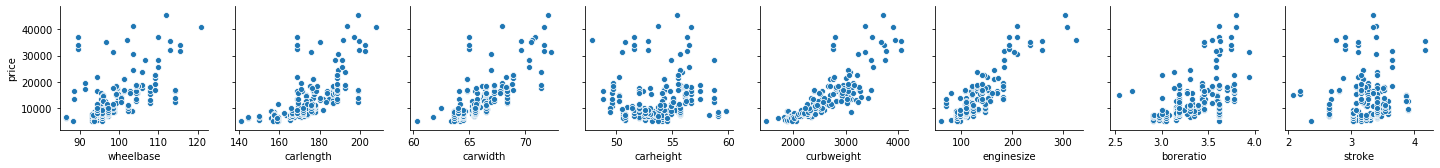

In [34]:
sns.pairplot(x_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke'],y_vars = 'price',data=df)

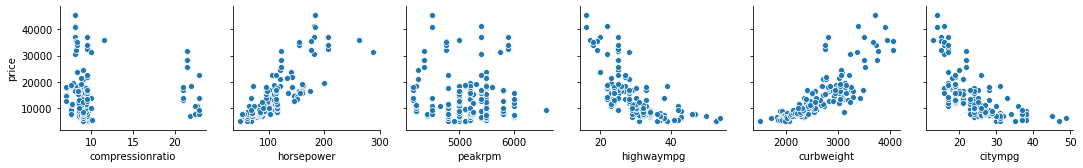

In [35]:
sns.pairplot(x_vars = ['compressionratio','horsepower','peakrpm','highwaympg','curbweight','citympg',],y_vars = 'price',data=df)

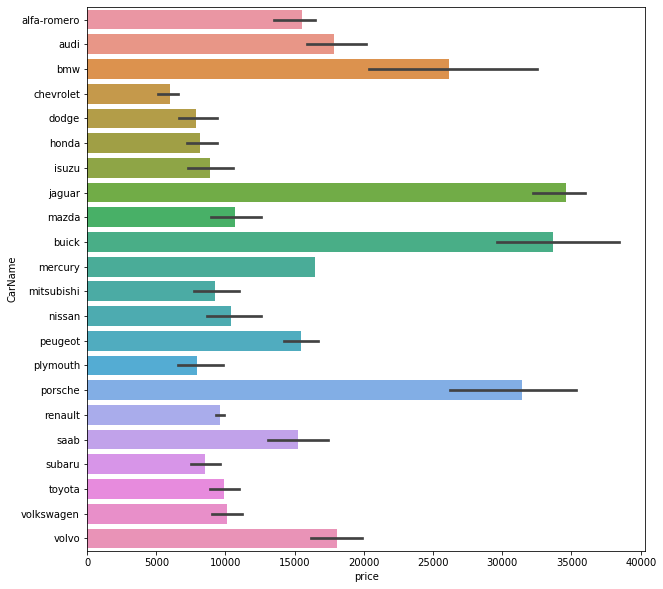

In [36]:
plt.subplots(figsize=(10,10))
sns.barplot(x = 'price',y = 'CarName',data=df)

## Features that doesn't seems to contribute in Price of the car:-
'symboling','stroke','carheight','compressionratio','peakrpm','enginelocation','doornumber','CarName'

## Features Selected:-
'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','fueltype',
            'aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'

In [37]:
df_mod = df[['CarName','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','fueltype',
            'aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','price']]
df_mod.head()

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,dohc,four,mpfi,13495.0
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,dohc,four,mpfi,16500.0
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,gas,std,hatchback,rwd,ohcv,six,mpfi,16500.0
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,gas,std,sedan,fwd,ohc,four,mpfi,13950.0
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,gas,std,sedan,4wd,ohc,five,mpfi,17450.0


In [38]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
CarName           205 non-null object
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginetype        205 non-null object
cylindernumber    205 non-null object
fuelsystem        205 non-null object
price             205 non-null float64
dtypes: float64(5), int64(5), object(8)
memory usage: 29.0+ KB


In [39]:
num_vars = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']

In [40]:
fueltype = pd.get_dummies(df_mod['fueltype'],drop_first = True)
fueltype
df_mod = pd.concat([df_mod,fueltype],axis=1)
df_mod = df_mod.drop(['fueltype'],axis=1)

In [41]:
df_mod.head()

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,price,gas
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,std,convertible,rwd,dohc,four,mpfi,13495.0,1
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,std,convertible,rwd,dohc,four,mpfi,16500.0,1
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,std,hatchback,rwd,ohcv,six,mpfi,16500.0,1
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,std,sedan,fwd,ohc,four,mpfi,13950.0,1
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,std,sedan,4wd,ohc,five,mpfi,17450.0,1


In [42]:
aspiration = pd.get_dummies(df_mod['aspiration'],drop_first = True)
df_mod = pd.concat([df_mod,aspiration],axis=1)
df_mod = df_mod.drop(['aspiration'],axis=1)

In [43]:
df_mod.head()

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,price,gas,turbo
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,convertible,rwd,dohc,four,mpfi,13495.0,1,0
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,convertible,rwd,dohc,four,mpfi,16500.0,1,0
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,hatchback,rwd,ohcv,six,mpfi,16500.0,1,0
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,sedan,fwd,ohc,four,mpfi,13950.0,1,0
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,sedan,4wd,ohc,five,mpfi,17450.0,1,0


In [44]:
drivewheel = pd.get_dummies(df_mod['drivewheel'],drop_first = True)
df_mod = pd.concat([df_mod,drivewheel],axis=1)
df_mod = df_mod.drop(['drivewheel'],axis=1)

In [45]:
df_mod.head(10)

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carbody,enginetype,cylindernumber,fuelsystem,price,gas,turbo,fwd,rwd
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,convertible,dohc,four,mpfi,13495.000,1,0,0,1
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,convertible,dohc,four,mpfi,16500.000,1,0,0,1
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,hatchback,ohcv,six,mpfi,16500.000,1,0,0,1
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,sedan,ohc,four,mpfi,13950.000,1,0,1,0
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,sedan,ohc,five,mpfi,17450.000,1,0,0,0
5,audi,99.8,177.3,66.3,2507,136,3.19,110,19,25,sedan,ohc,five,mpfi,15250.000,1,0,1,0
6,audi,105.8,192.7,71.4,2844,136,3.19,110,19,25,sedan,ohc,five,mpfi,17710.000,1,0,1,0
7,audi,105.8,192.7,71.4,2954,136,3.19,110,19,25,wagon,ohc,five,mpfi,18920.000,1,0,1,0
8,audi,105.8,192.7,71.4,3086,131,3.13,140,17,20,sedan,ohc,five,mpfi,23875.000,1,1,1,0
9,audi,99.5,178.2,67.9,3053,131,3.13,160,16,22,hatchback,ohc,five,mpfi,17859.167,1,1,0,0


In [46]:
carbody = pd.get_dummies(df_mod['carbody'],drop_first = True)
df_mod = pd.concat([df_mod,carbody],axis=1)
df_mod = df_mod.drop(['carbody'],axis=1)
df_mod.head(10)

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,fuelsystem,price,gas,turbo,fwd,rwd,hardtop,hatchback,sedan,wagon
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,mpfi,13495.000,1,0,0,1,0,0,0,0
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,mpfi,16500.000,1,0,0,1,0,0,0,0
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,mpfi,16500.000,1,0,0,1,0,1,0,0
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,mpfi,13950.000,1,0,1,0,0,0,1,0
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,mpfi,17450.000,1,0,0,0,0,0,1,0
5,audi,99.8,177.3,66.3,2507,136,3.19,110,19,25,...,mpfi,15250.000,1,0,1,0,0,0,1,0
6,audi,105.8,192.7,71.4,2844,136,3.19,110,19,25,...,mpfi,17710.000,1,0,1,0,0,0,1,0
7,audi,105.8,192.7,71.4,2954,136,3.19,110,19,25,...,mpfi,18920.000,1,0,1,0,0,0,0,1
8,audi,105.8,192.7,71.4,3086,131,3.13,140,17,20,...,mpfi,23875.000,1,1,1,0,0,0,1,0
9,audi,99.5,178.2,67.9,3053,131,3.13,160,16,22,...,mpfi,17859.167,1,1,0,0,0,1,0,0


In [47]:
df_mod['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

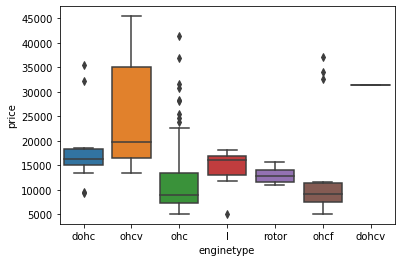

In [48]:

sns.boxplot(x='enginetype',y='price',data=df)

In [49]:
df_mod["OHC_Code"] = np.where(df_mod["enginetype"].str.contains("ohc"), 1, 0)

In [50]:
df_mod.drop(['enginetype'],axis=1,inplace=True)

In [51]:
df_mod.head(10)

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,price,gas,turbo,fwd,rwd,hardtop,hatchback,sedan,wagon,OHC_Code
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,13495.000,1,0,0,1,0,0,0,0,1
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,16500.000,1,0,0,1,0,0,0,0,1
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,16500.000,1,0,0,1,0,1,0,0,1
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,13950.000,1,0,1,0,0,0,1,0,1
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,17450.000,1,0,0,0,0,0,1,0,1
5,audi,99.8,177.3,66.3,2507,136,3.19,110,19,25,...,15250.000,1,0,1,0,0,0,1,0,1
6,audi,105.8,192.7,71.4,2844,136,3.19,110,19,25,...,17710.000,1,0,1,0,0,0,1,0,1
7,audi,105.8,192.7,71.4,2954,136,3.19,110,19,25,...,18920.000,1,0,1,0,0,0,0,1,1
8,audi,105.8,192.7,71.4,3086,131,3.13,140,17,20,...,23875.000,1,1,1,0,0,0,1,0,1
9,audi,99.5,178.2,67.9,3053,131,3.13,160,16,22,...,17859.167,1,1,0,0,0,1,0,0,1


In [52]:
df_mod.columns

Index(['CarName', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'cylindernumber', 'fuelsystem', 'price', 'gas', 'turbo', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'OHC_Code'],
      dtype='object')

In [53]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

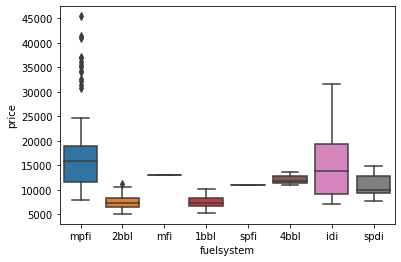

In [54]:
sns.boxplot(x = 'fuelsystem', y = 'price',data=df_mod)

In [55]:
fuelsystem = pd.get_dummies(df_mod['fuelsystem'],drop_first = True)
df_mod = pd.concat([df_mod,fuelsystem],axis=1)
df_mod = df_mod.drop(['fuelsystem'],axis=1)
df_mod.head(10)

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,sedan,wagon,OHC_Code,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,0,1,0,0,0,0,1,0,0
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,0,1,0,0,0,0,1,0,0
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,0,0,1,0,0,0,0,1,0,0
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,1,0,1,0,0,0,0,1,0,0
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,1,0,1,0,0,0,0,1,0,0
5,audi,99.8,177.3,66.3,2507,136,3.19,110,19,25,...,1,0,1,0,0,0,0,1,0,0
6,audi,105.8,192.7,71.4,2844,136,3.19,110,19,25,...,1,0,1,0,0,0,0,1,0,0
7,audi,105.8,192.7,71.4,2954,136,3.19,110,19,25,...,0,1,1,0,0,0,0,1,0,0
8,audi,105.8,192.7,71.4,3086,131,3.13,140,17,20,...,1,0,1,0,0,0,0,1,0,0
9,audi,99.5,178.2,67.9,3053,131,3.13,160,16,22,...,0,0,1,0,0,0,0,1,0,0


In [56]:
len(df_mod.columns)

28

In [57]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
CarName           205 non-null object
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
cylindernumber    205 non-null object
price             205 non-null float64
gas               205 non-null uint8
turbo             205 non-null uint8
fwd               205 non-null uint8
rwd               205 non-null uint8
hardtop           205 non-null uint8
hatchback         205 non-null uint8
sedan             205 non-null uint8
wagon             205 non-null uint8
OHC_Code          205 non-null int32
2bbl              205 non-null uint8
4bbl              205 non-null uint8
idi               205 non-null u

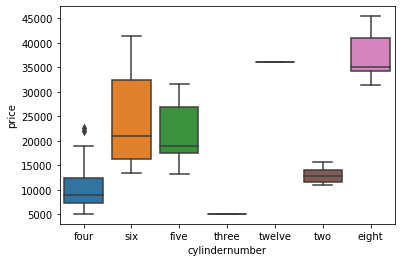

In [58]:
sns.boxplot(x='cylindernumber',y='price',data=df_mod)

In [59]:
cylindernumber = pd.get_dummies(df_mod['cylindernumber'],drop_first = True)
df_mod = pd.concat([df_mod,cylindernumber],axis=1)
df_mod = df_mod.drop(['cylindernumber'],axis=1)
df_mod.head(10)

,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,1,0,0,0,1,0,0,0,0
1,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,1,0,0,0,1,0,0,0,0
2,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,0,1,0,0,0,0,1,0,0,0
3,audi,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,0,1,0,0,0,1,0,0,0,0
4,audi,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,0,1,0,0,1,0,0,0,0,0
5,audi,99.8,177.3,66.3,2507,136,3.19,110,19,25,...,0,1,0,0,1,0,0,0,0,0
6,audi,105.8,192.7,71.4,2844,136,3.19,110,19,25,...,0,1,0,0,1,0,0,0,0,0
7,audi,105.8,192.7,71.4,2954,136,3.19,110,19,25,...,0,1,0,0,1,0,0,0,0,0
8,audi,105.8,192.7,71.4,3086,131,3.13,140,17,20,...,0,1,0,0,1,0,0,0,0,0
9,audi,99.5,178.2,67.9,3053,131,3.13,160,16,22,...,0,1,0,0,1,0,0,0,0,0


In [60]:
## Using Sklearn LabelEncoder to label our car company feature
label_maker = LabelEncoder()
df_mod["maker_code"] = label_maker.fit_transform(df_mod["CarName"])
df_mod[["CarName", "maker_code"]].head(11)

,CarName,maker_code
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,audi,1


In [61]:
df_mod.drop(['CarName'],axis=1,inplace=True)

In [62]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 33 columns):
wheelbase     205 non-null float64
carlength     205 non-null float64
carwidth      205 non-null float64
curbweight    205 non-null int64
enginesize    205 non-null int64
boreratio     205 non-null float64
horsepower    205 non-null int64
citympg       205 non-null int64
highwaympg    205 non-null int64
price         205 non-null float64
gas           205 non-null uint8
turbo         205 non-null uint8
fwd           205 non-null uint8
rwd           205 non-null uint8
hardtop       205 non-null uint8
hatchback     205 non-null uint8
sedan         205 non-null uint8
wagon         205 non-null uint8
OHC_Code      205 non-null int32
2bbl          205 non-null uint8
4bbl          205 non-null uint8
idi           205 non-null uint8
mfi           205 non-null uint8
mpfi          205 non-null uint8
spdi          205 non-null uint8
spfi          205 non-null uint8
five          205 non-null 

In [63]:
#Scaling the numerical variables
Scaler = MinMaxScaler()
#since we have already created the nummeric feature list 
print(num_vars)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']


In [64]:
#fit on data
df_mod[num_vars] = Scaler.fit_transform(df_mod[num_vars])
df_mod.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,mpfi,spdi,spfi,five,four,six,three,twelve,two,maker_code
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.262500,0.222222,0.289474,13495.0,...,1,0,0,0,1,0,0,0,0,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.262500,0.222222,0.289474,16500.0,...,1,0,0,0,1,0,0,0,0,0
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.441667,0.166667,0.263158,16500.0,...,1,0,0,0,0,1,0,0,0,0
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.225000,0.305556,0.368421,13950.0,...,1,0,0,0,1,0,0,0,0,1
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.279167,0.138889,0.157895,17450.0,...,1,0,0,1,0,0,0,0,0,1


In [65]:
#Splitting into train and test dataset
df_train,df_test = train_test_split(df_mod,train_size=0.7, random_state=100)
df_train.shape,df_test.shape

((143, 33), (62, 33))

In [66]:
df_train.price

122     7609.0
125    22018.0
166     9538.0
1      16500.0
199    18950.0
        ...   
87      9279.0
103    13499.0
67     25552.0
24      6229.0
8      23875.0
Name: price, Length: 143, dtype: float64

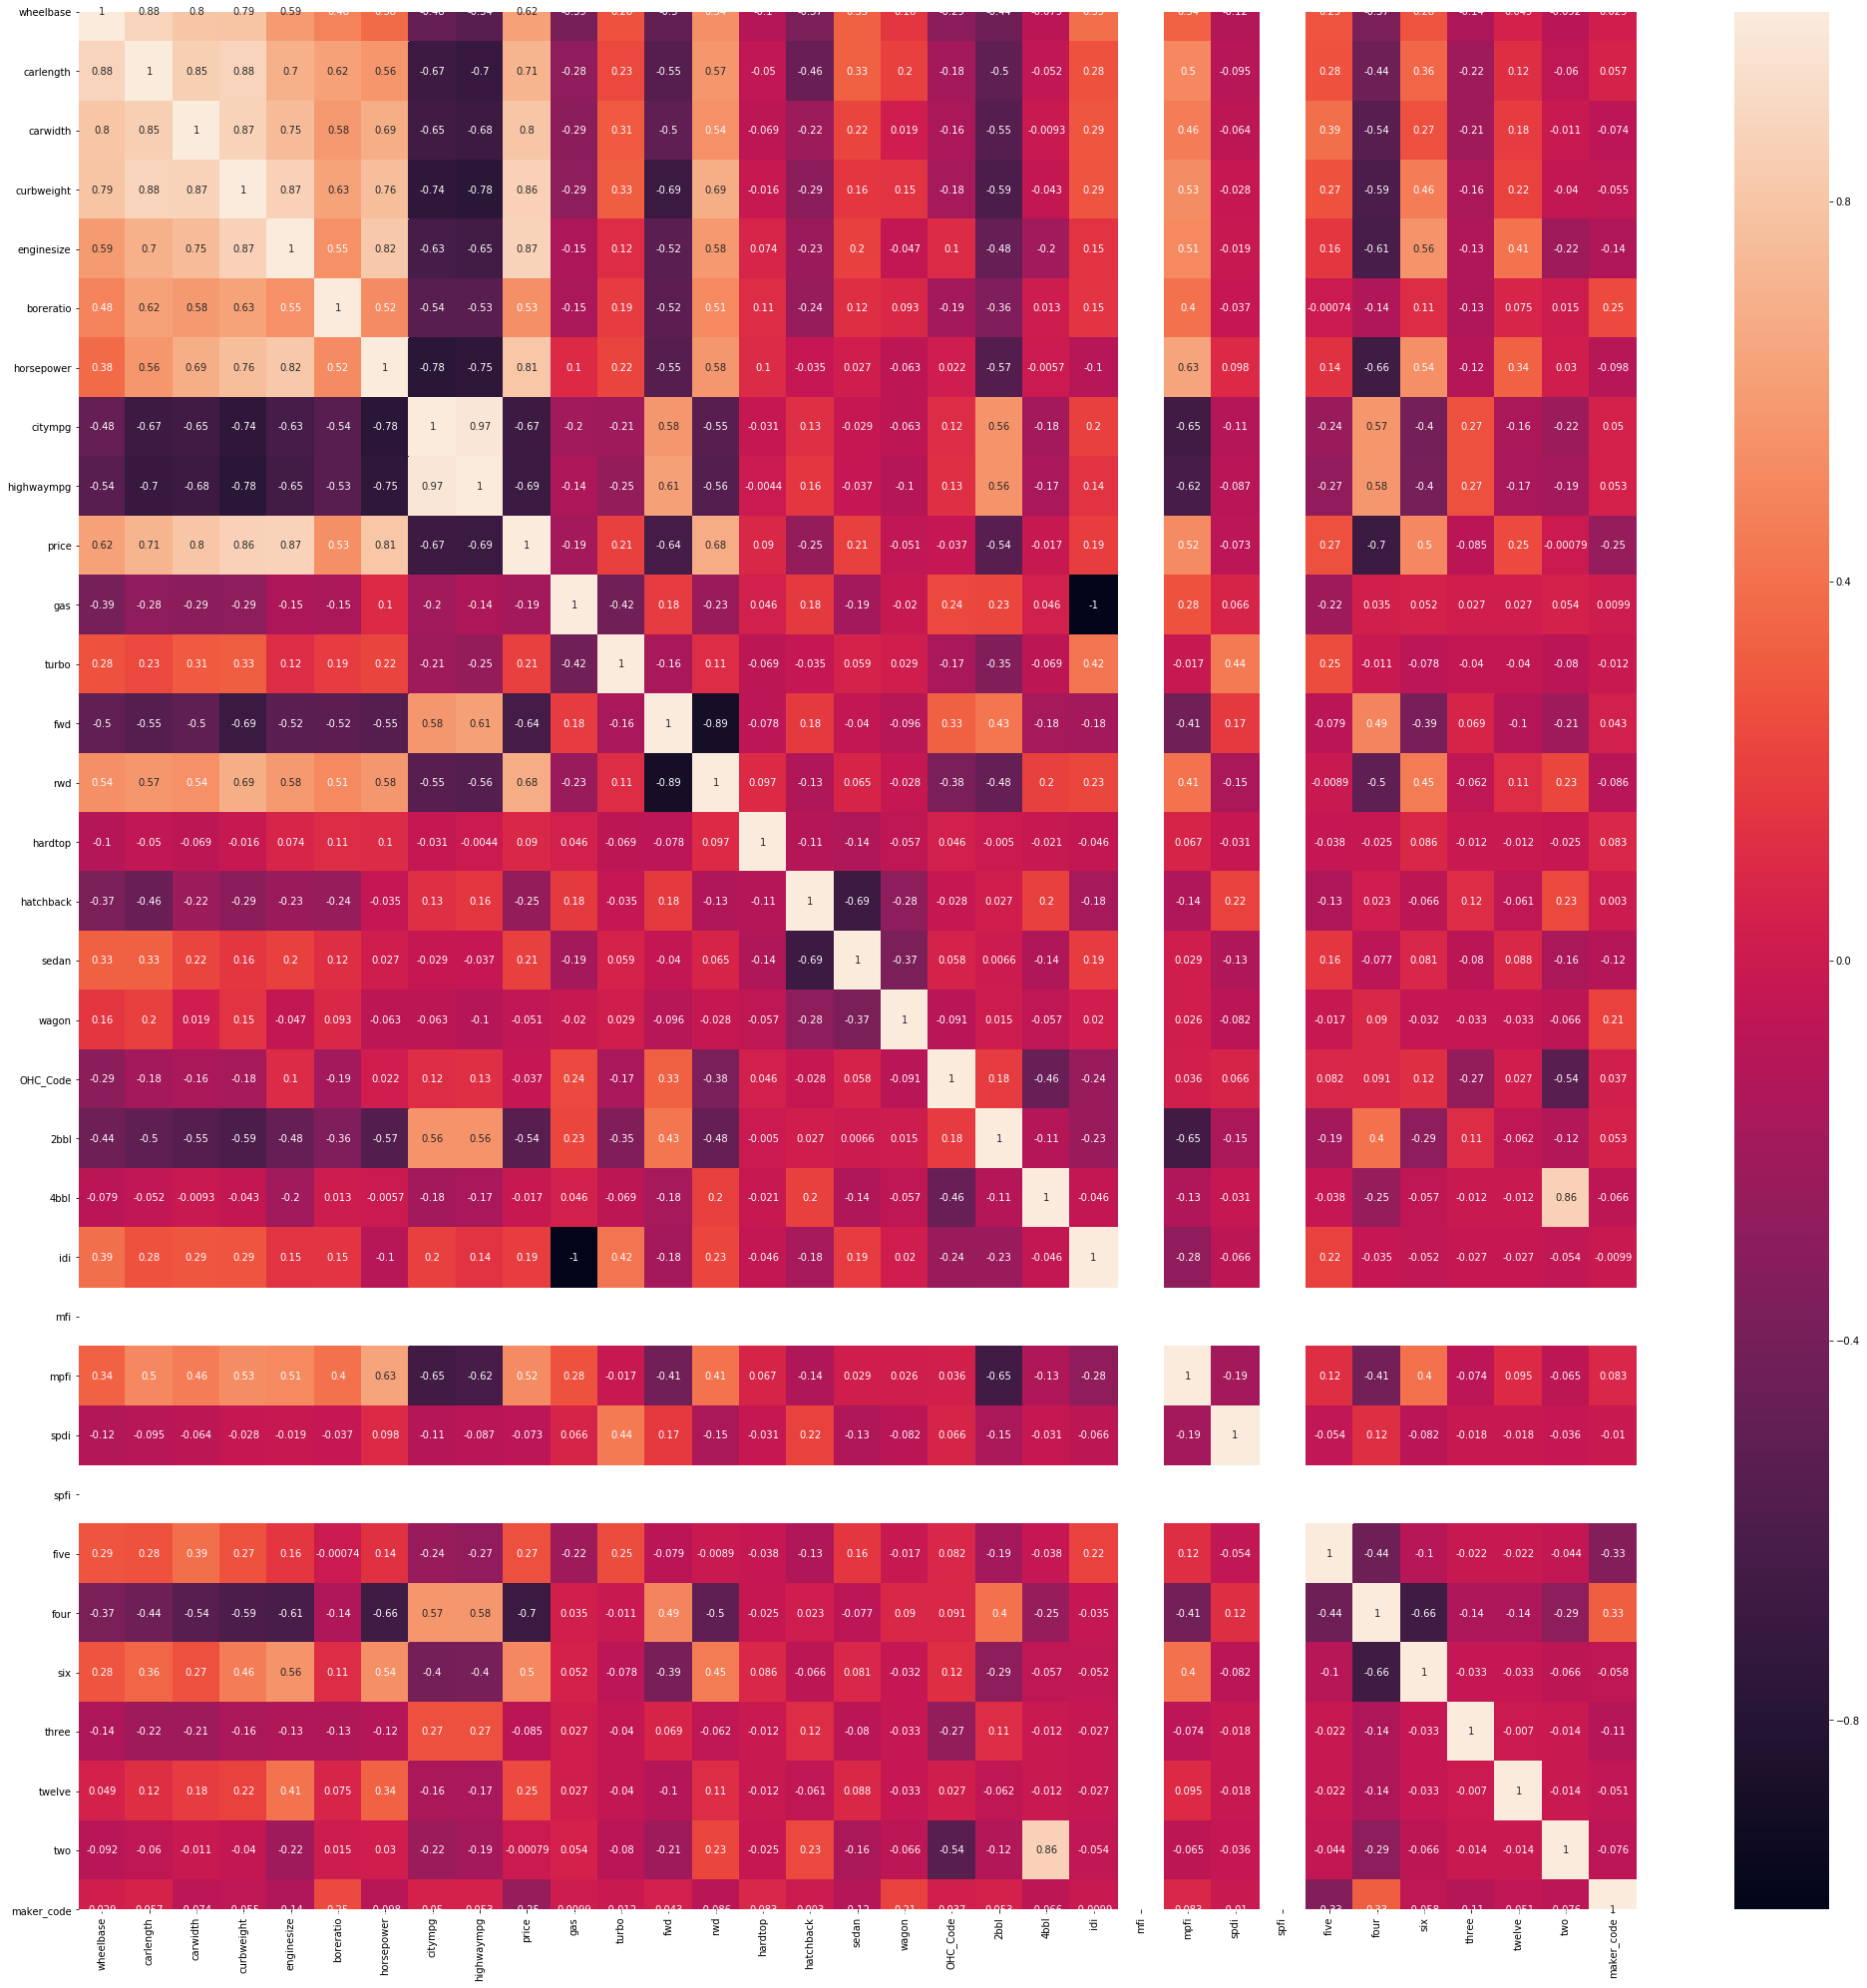

In [67]:
plt.subplots(figsize= (35,35))
sns.heatmap(df_train.corr(),annot=True)

In [68]:
Y_train = df_train.pop('price')
X_train = df_train

In [69]:
X_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,gas,...,mpfi,spdi,spfi,five,four,six,three,twelve,two,maker_code
122,0.206997,0.391045,0.291667,0.272692,0.139623,0.307143,0.083333,0.500000,0.578947,1,...,0,0,0,0,1,0,0,0,0,14
125,0.230321,0.414925,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.289474,1,...,1,0,0,0,1,0,0,0,0,15
166,0.230321,0.411940,0.308333,0.314973,0.139623,0.500000,0.266667,0.361111,0.342105,1,...,1,0,0,0,1,0,0,0,0,19
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.262500,0.222222,0.289474,1,...,1,0,0,0,1,0,0,0,0,0
199,0.516035,0.711940,0.575000,0.647401,0.260377,0.771429,0.475000,0.111111,0.157895,1,...,1,0,0,0,1,0,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.282799,0.467164,0.425000,0.354926,0.184906,0.450000,0.283333,0.277778,0.368421,1,...,0,1,0,0,1,0,0,0,0,11
103,0.402332,0.649254,0.516667,0.609775,0.452830,0.635714,0.433333,0.166667,0.236842,1,...,1,0,0,0,0,1,0,0,0,12
67,0.682216,0.743284,0.833333,0.786268,0.460377,0.742857,0.312500,0.250000,0.236842,0,...,0,0,0,1,0,0,0,0,0,3
24,0.206997,0.241791,0.291667,0.185803,0.109434,0.307143,0.083333,0.500000,0.578947,1,...,0,0,0,0,1,0,0,0,0,5


In [70]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'gas', 'turbo',
       'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'OHC_Code',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'five', 'four',
       'six', 'three', 'twelve', 'two', 'maker_code'],
      dtype='object')

In [71]:
#We are going to use recursive feature elimination to select 15 best column and make the model
lm = LinearRegression()
lm.fit(X_train,Y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,Y_train)

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 7),
 ('horsepower', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('gas', False, 13),
 ('turbo', False, 6),
 ('fwd', False, 8),
 ('rwd', False, 2),
 ('hardtop', False, 9),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('OHC_Code', True, 1),
 ('2bbl', False, 14),
 ('4bbl', False, 10),
 ('idi', False, 15),
 ('mfi', False, 17),
 ('mpfi', False, 12),
 ('spdi', False, 5),
 ('spfi', False, 18),
 ('five', False, 11),
 ('four', False, 3),
 ('six', False, 4),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('maker_code', False, 16)]

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'citympg', 'highwaympg', 'hatchback', 'sedan', 'wagon',
       'OHC_Code', 'three', 'twelve', 'two'],
      dtype='object')

In [74]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,hatchback,sedan,wagon,OHC_Code,three,twelve,two
122,0.206997,0.391045,0.291667,0.272692,0.139623,0.083333,0.500000,0.578947,0,1,0,1,0,0,0
125,0.230321,0.414925,0.666667,0.500388,0.339623,0.395833,0.166667,0.289474,1,0,0,1,0,0,0
166,0.230321,0.411940,0.308333,0.314973,0.139623,0.266667,0.361111,0.342105,1,0,0,1,0,0,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.262500,0.222222,0.289474,0,0,0,1,0,0,0
199,0.516035,0.711940,0.575000,0.647401,0.260377,0.475000,0.111111,0.157895,0,0,1,1,0,0,0


In [75]:
#adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(Y_train,X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     58.96
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.03e-49
Time:                        12:56:03   Log-Likelihood:                -1335.7
No. Observations:                 143   AIC:                             2703.
Df Residuals:                     127   BIC:                             2751.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2547.5924   2746.708     -0.928      0.355   -7982.832    2887.648
wheelbase   9931.5121   4152.655      2.392      0.018    1714.156    1.81e+04
carlength  -9139.0327   4435.976     -2.060      0.041   -1.79e+04    -361.037
carwidth    7754.0047   3360.268      2.308      0.023    1104.641    1.44e+04
curbweight  1.206e+04   5078.479      2.375      0.019    2010.590    2.21e+04
enginesize  1.713e+04   5446.025      3.146      0.002    6354.188    2.79e+04
horsepower  1.186e+04   3971.694      2.986      0.003    3999.094    1.97e+04
citympg    -1404.6655   7012.029     -0.200      0.842   -1.53e+04    1.25e+04
highwaympg  4430.6418   6824.658      0.649      0.517   -9074.124    1.79e+04
hatchback  -5358.9741   1342.483     -3.992      0.000   -8015.505   -2702.443
sedan      -3423.6349   1387.831     -2.467      0.015   -6169.902    -677.367
wagon      -4575.3685   1549.173     -2.953      0.004   -7640.901   -1509.836
OHC_Code    4121.9752   1393.535      2.958      0.004    1364.420    6879.530
three       9548.9618   3440.499      2.775      0.006    2740.836    1.64e+04
twelve     -5701.8187   3683.229     -1.548      0.124    -1.3e+04    1586.626
two         9952.8782   2183.675      4.558      0.000    5631.780    1.43e+04
==============================================================================
Omnibus:                       44.822   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.583
Skew:                           0.936   Prob(JB):                     1.73e-54
Kurtosis:                       9.168   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#checking the vif
def checking_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [77]:
checking_vif(X_train_rfe)

,Features,VIF
0,const,126.07
7,citympg,28.28
8,highwaympg,26.03
4,curbweight,19.10
5,enginesize,11.77
2,carlength,11.55
1,wheelbase,8.65
10,sedan,8.03
6,horsepower,7.17
9,hatchback,6.78


In [78]:
X_train_rfe.head()

,const,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,hatchback,sedan,wagon,OHC_Code,three,twelve,two
122,1.0,0.206997,0.391045,0.291667,0.272692,0.139623,0.083333,0.500000,0.578947,0,1,0,1,0,0,0
125,1.0,0.230321,0.414925,0.666667,0.500388,0.339623,0.395833,0.166667,0.289474,1,0,0,1,0,0,0
166,1.0,0.230321,0.411940,0.308333,0.314973,0.139623,0.266667,0.361111,0.342105,1,0,0,1,0,0,0
1,1.0,0.058309,0.413433,0.316667,0.411171,0.260377,0.262500,0.222222,0.289474,0,0,0,1,0,0,0
199,1.0,0.516035,0.711940,0.575000,0.647401,0.260377,0.475000,0.111111,0.157895,0,0,1,1,0,0,0


In [79]:
X_train_new = X_train_rfe.drop(['citympg','highwaympg','twelve'],axis=1)

In [80]:
X_train_new.head()

,const,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,hatchback,sedan,wagon,OHC_Code,three,two
122,1.0,0.206997,0.391045,0.291667,0.272692,0.139623,0.083333,0,1,0,1,0,0
125,1.0,0.230321,0.414925,0.666667,0.500388,0.339623,0.395833,1,0,0,1,0,0
166,1.0,0.230321,0.411940,0.308333,0.314973,0.139623,0.266667,1,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.411171,0.260377,0.262500,0,0,0,1,0,0
199,1.0,0.516035,0.711940,0.575000,0.647401,0.260377,0.475000,0,0,1,1,0,0


In [81]:
#aagin building a model with 'citympg','highwaympg','twelve' feature due to its high p value
X_train_new = sm.add_constant(X_train_new)
lr = sm.OLS(Y_train,X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     72.81
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.23e-51
Time:                        12:56:03   Log-Likelihood:                -1337.9
No. Observations:                 143   AIC:                             2702.
Df Residuals:                     130   BIC:                             2740.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -404.1715   1920.404     -0.210      0.834   -4203.462    3395.119
wheelbase   1.029e+04   4002.626      2.571      0.011    2371.434    1.82e+04
carlength  -9776.7489   4091.856     -2.389      0.018   -1.79e+04   -1681.501
carwidth    8142.5362   3311.392      2.459      0.015    1591.343    1.47e+04
curbweight  1.229e+04   4757.472      2.584      0.011    2879.443    2.17e+04
enginesize  1.434e+04   4658.044      3.079      0.003    5126.715    2.36e+04
horsepower  1.033e+04   3321.444      3.111      0.002    3760.340    1.69e+04
hatchback  -5446.9970   1313.696     -4.146      0.000   -8045.988   -2848.006
sedan      -3576.1324   1334.801     -2.679      0.008   -6216.876    -935.389
wagon      -4944.8923   1480.944     -3.339      0.001   -7874.762   -2015.022
OHC_Code    4307.7430   1343.671      3.206      0.002    1649.452    6966.034
three       1.046e+04   3368.775      3.106      0.002    3797.442    1.71e+04
two         8996.4601   2092.823      4.299      0.000    4856.059    1.31e+04
==============================================================================
Omnibus:                       56.200   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.246
Skew:                           1.229   Prob(JB):                     1.94e-72
Kurtosis:                      10.027   Cond. No.                         43.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
checking_vif(X_train_new)

,Features,VIF
0,const,61.16
4,curbweight,16.64
2,carlength,9.75
5,enginesize,8.54
1,wheelbase,7.97
8,sedan,7.37
7,hatchback,6.45
3,carwidth,6.15
6,horsepower,4.98
9,wagon,4.19


In [83]:
X_train_new = X_train_new.drop(['curbweight'],axis=1)

In [84]:
X_train_new.head()

,const,wheelbase,carlength,carwidth,enginesize,horsepower,hatchback,sedan,wagon,OHC_Code,three,two
122,1.0,0.206997,0.391045,0.291667,0.139623,0.083333,0,1,0,1,0,0
125,1.0,0.230321,0.414925,0.666667,0.339623,0.395833,1,0,0,1,0,0
166,1.0,0.230321,0.411940,0.308333,0.139623,0.266667,1,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.260377,0.262500,0,0,0,1,0,0
199,1.0,0.516035,0.711940,0.575000,0.260377,0.475000,0,0,1,1,0,0


In [85]:
#aagin building a model with 'citympg','highwaympg','twelve' feature due to its high p value
X_train_new = sm.add_constant(X_train_new)
lr = sm.OLS(Y_train,X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     75.55
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           3.44e-51
Time:                        12:56:03   Log-Likelihood:                -1341.5
No. Observations:                 143   AIC:                             2707.
Df Residuals:                     131   BIC:                             2743.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.6703   1938.788      0.180      0.857   -3485.715    4185.055
wheelbase   1.278e+04   3967.791      3.222      0.002    4934.289    2.06e+04
carlength  -6062.6258   3913.122     -1.549      0.124   -1.38e+04    1678.462
carwidth    9623.5689   3331.293      2.889      0.005    3033.476    1.62e+04
enginesize  2.102e+04   3958.399      5.310      0.000    1.32e+04    2.88e+04
horsepower  1.265e+04   3266.223      3.874      0.000    6190.640    1.91e+04
hatchback  -5890.4403   1330.349     -4.428      0.000   -8522.187   -3258.693
sedan      -4257.9126   1336.498     -3.186      0.002   -6901.824   -1614.001
wagon      -4854.4820   1512.260     -3.210      0.002   -7846.093   -1862.871
OHC_Code    3467.1205   1331.622      2.604      0.010     832.855    6101.386
three       1.002e+04   3436.547      2.916      0.004    3222.605    1.68e+04
two         9358.0500   2132.890      4.387      0.000    5138.685    1.36e+04
==============================================================================
Omnibus:                       41.785   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.878
Skew:                           0.921   Prob(JB):                     1.31e-42
Kurtosis:                       8.383   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X_train_new = X_train_new.drop(['carlength'],axis=1)

In [87]:
#aagin building a model with 'citympg','highwaympg','twelve' feature due to its high p value
X_train_new = sm.add_constant(X_train_new)
lr = sm.OLS(Y_train,X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     81.99
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.20e-51
Time:                        12:56:03   Log-Likelihood:                -1342.8
No. Observations:                 143   AIC:                             2708.
Df Residuals:                     132   BIC:                             2740.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -367.7737   1892.634     -0.194      0.846   -4111.591    3376.043
wheelbase   9353.4746   3310.123      2.826      0.005    2805.725    1.59e+04
carwidth    8154.9843   3210.483      2.540      0.012    1804.331    1.45e+04
enginesize  2.043e+04   3960.753      5.157      0.000    1.26e+04    2.83e+04
horsepower  1.177e+04   3233.359      3.640      0.000    5375.109    1.82e+04
hatchback  -5475.7650   1310.040     -4.180      0.000   -8067.154   -2884.376
sedan      -4263.1643   1343.564     -3.173      0.002   -6920.867   -1605.462
wagon      -5107.1565   1511.394     -3.379      0.001   -8096.843   -2117.470
OHC_Code    3367.6176   1337.109      2.519      0.013     722.684    6012.551
three        1.05e+04   3440.496      3.053      0.003    3698.044    1.73e+04
two         8918.5574   2125.125      4.197      0.000    4714.850    1.31e+04
==============================================================================
Omnibus:                       34.408   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.422
Skew:                           0.765   Prob(JB):                     8.75e-31
Kurtosis:                       7.571   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
checking_vif(X_train_new)

,Features,VIF
0,const,56.34
6,sedan,7.08
5,hatchback,6.08
3,enginesize,5.86
2,carwidth,5.48
1,wheelbase,5.17
4,horsepower,4.47
7,wagon,4.14
8,OHC_Code,2.32
10,two,1.93


In [89]:
X_train_new = X_train_new.drop(['sedan'],axis=1)

In [90]:
#aagin building a model with 'citympg','highwaympg','twelve' feature due to its high p value
X_train_new = sm.add_constant(X_train_new)
lr = sm.OLS(Y_train,X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     84.24
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.54e-50
Time:                        12:56:03   Log-Likelihood:                -1348.1
No. Observations:                 143   AIC:                             2716.
Df Residuals:                     133   BIC:                             2746.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2954.4946   1765.331     -1.674      0.097   -6446.251     537.262
wheelbase   5478.0813   3179.709      1.723      0.087    -811.261    1.18e+04
carwidth    8672.8837   3313.835      2.617      0.010    2118.246    1.52e+04
enginesize  2.328e+04   3986.899      5.838      0.000    1.54e+04    3.12e+04
horsepower   1.13e+04   3338.287      3.386      0.001    4699.827    1.79e+04
hatchback  -1807.5176    636.860     -2.838      0.005   -3067.203    -547.832
wagon      -1035.6795    825.420     -1.255      0.212   -2668.329     596.970
OHC_Code    2601.6632   1359.233      1.914      0.058     -86.846    5290.173
three       9625.5327   3544.328      2.716      0.007    2614.989    1.66e+04
two         8583.2372   2193.660      3.913      0.000    4244.262    1.29e+04
==============================================================================
Omnibus:                       32.813   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.669
Skew:                           0.818   Prob(JB):                     5.08e-23
Kurtosis:                       6.815   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
checking_vif(X_train_new)

,Features,VIF
0,const,45.89
3,enginesize,5.56
2,carwidth,5.47
1,wheelbase,4.47
4,horsepower,4.46
7,OHC_Code,2.25
9,two,1.93
5,hatchback,1.35
8,three,1.28
6,wagon,1.16


In [92]:
X_train_new = X_train_new.drop(['wheelbase','wagon'],axis=1)

In [93]:
#aagin building a model with 'citympg','highwaympg','twelve' feature due to its high p value
X_train_new = sm.add_constant(X_train_new)
lr = sm.OLS(Y_train,X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.2
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.01e-51
Time:                        12:56:03   Log-Likelihood:                -1350.2
No. Observations:                 143   AIC:                             2716.
Df Residuals:                     135   BIC:                             2740.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2276.1490   1625.701     -1.400      0.164   -5491.285     938.987
carwidth    1.246e+04   2481.721      5.021      0.000    7553.184    1.74e+04
enginesize  2.562e+04   3833.807      6.683      0.000     1.8e+04    3.32e+04
horsepower  8973.2731   3116.944      2.879      0.005    2808.916    1.51e+04
hatchback  -1829.8268    606.809     -3.015      0.003   -3029.908    -629.746
OHC_Code    1860.6349   1252.682      1.485      0.140    -616.785    4338.055
three       9256.9758   3549.046      2.608      0.010    2238.054    1.63e+04
two         8107.0778   2155.178      3.762      0.000    3844.799    1.24e+04
==============================================================================
Omnibus:                       30.722   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.131
Skew:                           0.761   Prob(JB):                     2.20e-21
Kurtosis:                       6.694   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
checking_vif(X_train_new)

,Features,VIF
0,const,38.35
2,enginesize,5.06
3,horsepower,3.83
1,carwidth,3.02
5,OHC_Code,1.88
7,two,1.83
6,three,1.27
4,hatchback,1.20


In [95]:
X_train_new = X_train_new.drop(['OHC_Code'],axis=1)

In [96]:
#aagin building a model with 'citympg','highwaympg','twelve' feature due to its high p value
X_train_new = sm.add_constant(X_train_new)
lr = sm.OLS(Y_train,X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           2.59e-52
Time:                        12:56:03   Log-Likelihood:                -1351.3
No. Observations:                 143   AIC:                             2717.
Df Residuals:                     136   BIC:                             2737.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -194.4256    827.425     -0.235      0.815   -1830.708    1441.857
carwidth    1.111e+04   2319.570      4.790      0.000    6524.383    1.57e+04
enginesize  2.611e+04   3836.811      6.804      0.000    1.85e+04    3.37e+04
horsepower  9640.1284   3098.088      3.112      0.002    3513.470    1.58e+04
hatchback  -1746.7228    606.897     -2.878      0.005   -2946.899    -546.547
three       7092.1484   3250.284      2.182      0.031     664.513    1.35e+04
two         6357.7524   1812.900      3.507      0.001    2772.633    9942.872
==============================================================================
Omnibus:                       29.806   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.514
Skew:                           0.760   Prob(JB):                     1.64e-19
Kurtosis:                       6.494   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
checking_vif(X_train_new)

,Features,VIF
0,const,9.85
2,enginesize,5.03
3,horsepower,3.76
1,carwidth,2.62
6,two,1.29
4,hatchback,1.19
5,three,1.06


## Residual Analysis:-

In [98]:
#PRedicting on Y_train data
Y_train_pred = lr.predict(X_train_new)

In [99]:
Y_train_pred

122     7494.908133
125    18148.949420
166     7700.733444
1      12652.440921
199    17571.432231
           ...     
87     12086.672235
103    21545.977484
67     24096.796728
24      4960.046276
8      20675.286958
Length: 143, dtype: float64

In [100]:
#evaluating residuals
res = Y_train - Y_train_pred

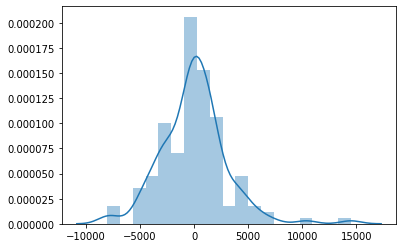

In [101]:
sns.distplot(res)

## Predicting and Evaluating on test set:-

In [102]:
Y_test = df_test.pop('price')
X_test = df_test

In [103]:
X_test_new = sm.add_constant(X_test)

In [104]:
X_test_new.head()

,const,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,mpfi,spdi,spfi,five,four,six,three,twelve,two,maker_code
160,1.0,0.265306,0.376119,0.341667,0.235066,0.139623,0.464286,0.091667,0.694444,0.815789,...,0,0,0,0,1,0,0,0,0,19
186,1.0,0.311953,0.456716,0.433333,0.305275,0.181132,0.464286,0.154167,0.388889,0.473684,...,1,0,0,0,1,0,0,0,0,20
59,1.0,0.355685,0.547761,0.516667,0.347944,0.230189,0.607143,0.150000,0.361111,0.421053,...,0,0,0,0,1,0,0,0,0,9
165,1.0,0.230321,0.411940,0.308333,0.301396,0.139623,0.500000,0.266667,0.361111,0.342105,...,1,0,0,0,1,0,0,0,0,19
140,1.0,0.195335,0.241791,0.291667,0.291699,0.177358,0.771429,0.104167,0.361111,0.394737,...,0,0,0,0,1,0,0,0,0,18


In [106]:
X_test_new = X_test_new[X_train_new.columns]

In [107]:
X_test_new.head()

,const,carwidth,enginesize,horsepower,hatchback,three,two
160,1.0,0.341667,0.139623,0.091667,0,0,0
186,1.0,0.433333,0.181132,0.154167,0,0,0
59,1.0,0.516667,0.230189,0.150000,1,0,0
165,1.0,0.308333,0.139623,0.266667,0,0,0
140,1.0,0.291667,0.177358,0.104167,1,0,0


In [108]:
#making Predictions
Y_pred = lr.predict(X_test_new)

In [109]:
Y_pred

160     8130.816219
186    10835.567215
59     11255.359351
165     9447.456232
140     6934.195190
           ...     
28     11403.434283
29     16869.958466
182     8327.840958
40      8196.383387
128    23646.965354
Length: 62, dtype: float64

## Model Evaluation:-

In [110]:
#computing r-squared value
r2_score(y_true = Y_test,y_pred = Y_pred)

0.8256615615322076

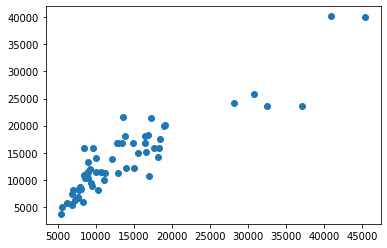

In [118]:
plt.scatter(Y_test,Y_pred)